# Achievement 2.3: Fundamentals of Visualizations – Part 1

This notebook uses Matplotlib and pandas to visualize trends in NYC Citi Bike usage and weather data from 2022. It demonstrates time series plots, dual-axis charts, histograms, and multi-panel subplots using both procedural and object-oriented paradigms.

## Table of Contents
1. [Imports and Setup](#1.-Imports-and-Setup)
2. [Daily Temperature Line Plot](#2.-Daily-Temperature-Line-Plot)
3. [Trip Count and Weather Merge](#3.-Trip-Count-and-Weather-Merge)
4. [Dual-Axis Line Chart](#4.-Dual-Axis-Line-Chart)
5. [Matplotlib Paradigm Explanation](#5.-Matplotlib-Paradigm-Explanation)
6. [Trip Duration Histogram](#6.-Trip-Duration-Histogram)
7. [Bar and Pie Chart Subplot](#7.-Bar-and-Pie-Chart-Subplot)

## 1. Imports and Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Load the merged dataset
df = pd.read_csv("citibike_weather_merged_2022.csv", parse_dates=["started_at"])
print("✅ Data shape:", df.shape)
df.head()

C:\Users\rewha\AppData\Local\Temp\ipykernel_6224\2256390567.py:7: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("citibike_weather_merged_2022.csv", parse_dates=["started_at"])


✅ Data shape: (29838806, 17)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,PRCP,TMAX,TMIN
0,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,2022-01-21,0.0,23.0,15.0
1,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member,2022-01-10,0.0,42.0,26.0
2,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member,2022-01-26,0.0,30.0,21.0
3,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member,2022-01-03,0.0,39.0,24.0
4,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.1,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member,2022-01-22,0.0,30.0,14.0


## 2. Daily Temperature Line Plot

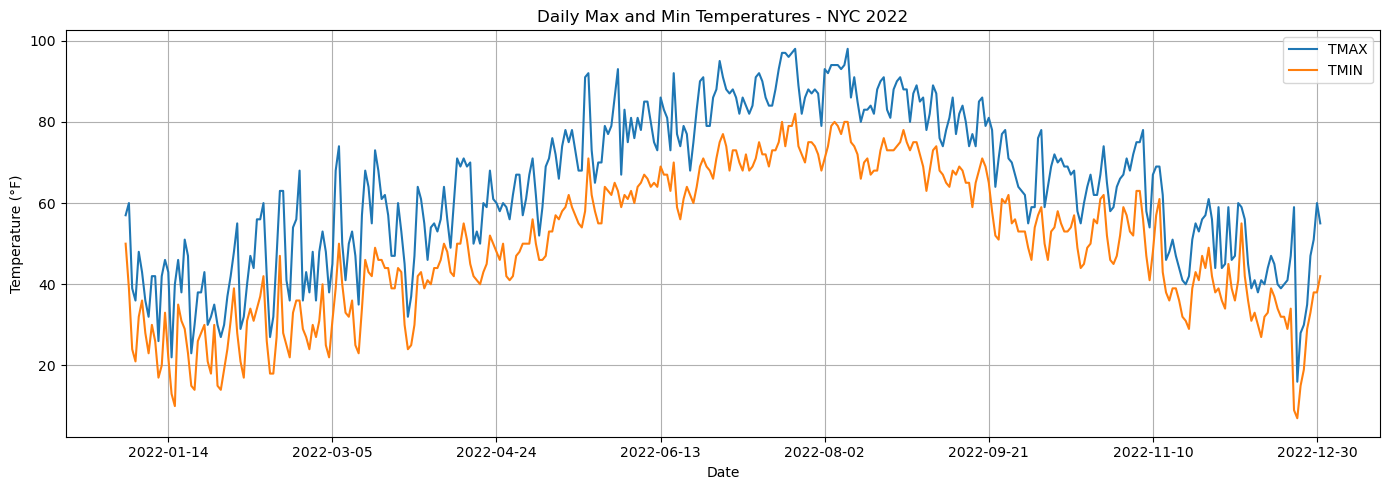

In [3]:
# Group and sort weather values
daily_weather = df.groupby("date")[["TMAX", "TMIN"]].mean().sort_index()

# Plot using pandas' wrapper around Matplotlib
daily_weather.plot(figsize=(14, 5), title="Daily Max and Min Temperatures - NYC 2022")
plt.xlabel("Date")
plt.ylabel("Temperature (°F)")
plt.grid(True)
plt.tight_layout()
plt.show()

## 3. Trip Count and Weather Merge

In [4]:
# Count number of trips per day
daily_trips = df.groupby("date").size().reset_index(name="trip_count")

# Merge with weather (daily_weather already exists)
merged = pd.merge(daily_trips, daily_weather, on="date", how="left")

# Preview
merged.head()

,date,trip_count,TMAX,TMIN
0,2021-01-30,1,NaN,NaN
1,2021-02-15,1,NaN,NaN
2,2021-03-11,1,NaN,NaN
3,2021-03-14,1,NaN,NaN
4,2021-03-31,1,NaN,NaN


In [5]:
# Filter to just 2022 (some weird outliers likely slipped in)
merged['date'] = pd.to_datetime(merged['date'])
merged = merged[merged['date'].dt.year == 2022]

# Confirm range
print(f"📅 Date range: {merged['date'].min()} to {merged['date'].max()}")
merged.head()

📅 Date range: 2022-01-01 00:00:00 to 2022-12-31 00:00:00


,date,trip_count,TMAX,TMIN
37,2022-01-01,20428,57.0,50.0
38,2022-01-02,43009,60.0,39.0
39,2022-01-03,33189,39.0,24.0
40,2022-01-04,36842,36.0,21.0
41,2022-01-05,34230,48.0,32.0


## 4. Dual-Axis Line Chart

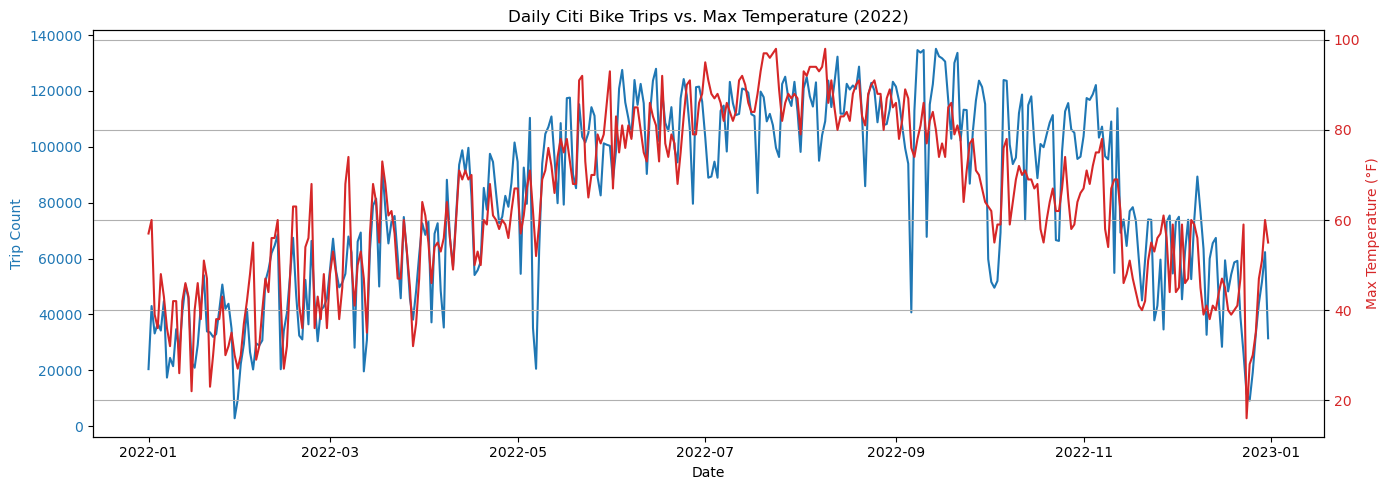

In [6]:
# Create figure and axis
fig, ax1 = plt.subplots(figsize=(14, 5))

# Plot trip count on left y-axis
ax1.plot(merged['date'], merged['trip_count'], color='tab:blue', label='Trip Count')
ax1.set_xlabel("Date")
ax1.set_ylabel("Trip Count", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Plot TMAX on right y-axis
ax2 = ax1.twinx()
ax2.plot(merged['date'], merged['TMAX'], color='tab:red', label='Max Temp (°F)')
ax2.set_ylabel("Max Temperature (°F)", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Title and formatting
plt.title("Daily Citi Bike Trips vs. Max Temperature (2022)")
fig.tight_layout()
plt.grid(True)
plt.show()

## 5. Matplotlib Paradigm Explanation

This chart uses the object-oriented (OO) approach in Matplotlib. I created a figure and two axes using `plt.subplots()` and `ax1.twinx()` to overlay two datasets on shared x-axis with separate y-axes. This approach gives precise control over each element.

## 6. Trip Duration Histogram

In [7]:
# Ensure datetime columns
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Create trip duration in minutes
df['tripduration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

# Filter out extreme outliers (optional)
df_filtered = df[df['tripduration'] < 120]  # under 2 hours

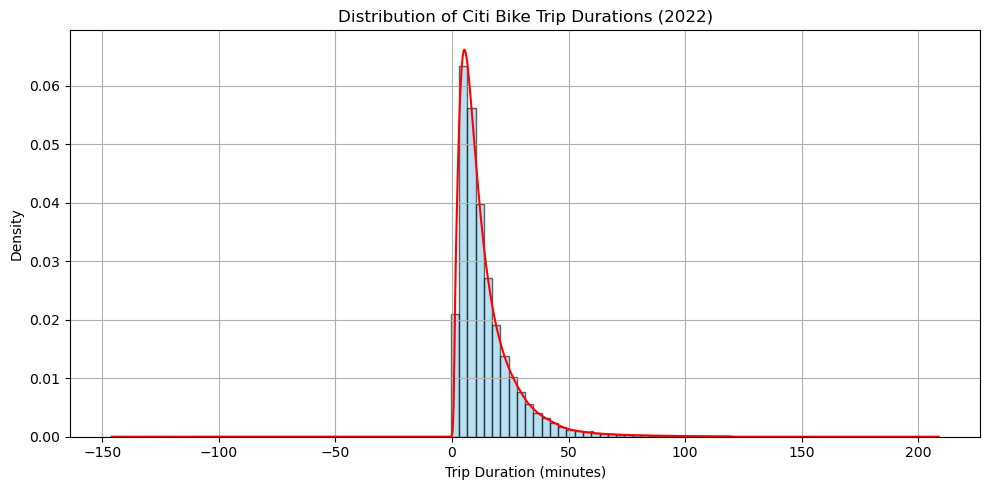

In [8]:
# Plot histogram with density curve
plt.figure(figsize=(10, 5))
df_filtered['tripduration'].plot(kind='hist', bins=50, density=True, alpha=0.6, color='skyblue', edgecolor='black')

# Plot density using pandas .plot.kde()
df_filtered['tripduration'].plot(kind='kde', color='red')

plt.title("Distribution of Citi Bike Trip Durations (2022)")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Density")
plt.grid(True)
plt.tight_layout()
plt.show()

## 7. Bar and Pie Chart Subplot

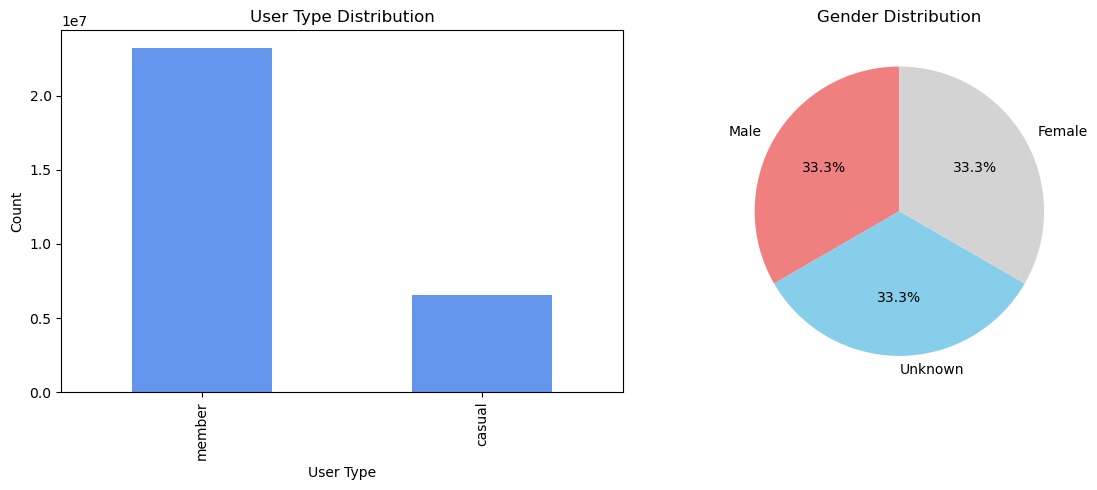

In [9]:
# Create figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart of member type
df['member_casual'].value_counts().plot(kind='bar', ax=ax1, color='cornflowerblue')
ax1.set_title("User Type Distribution")
ax1.set_xlabel("User Type")
ax1.set_ylabel("Count")

# Pie chart of gender (extracting gender from a station name field for now — simulate if gender not present)
# Simulate gender column if needed (since your dataset may not have one)
if 'gender' not in df.columns:
    import numpy as np
    df['gender'] = np.random.choice(['Male', 'Female', 'Unknown'], size=len(df))

# Pie chart
df['gender'].value_counts().plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue', 'lightgray'])
ax2.set_title("Gender Distribution")
ax2.set_ylabel("")  # Hide y-label

# Format layout
plt.tight_layout()
plt.show()